# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

In [176]:
import pandas as pd
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [177]:
# Importing data 
df_single = pd.read_csv(r'C:\Users\Anders\Google Drev\Uni\Kandidat\1\SDS E&ML\sds_eml_2020-master\material\session_12\peer_effects_room.csv')
df

,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944
...,...,...,...,...,...
3990,1951,54,2.111587,-0.610765,1860
3993,1884,178,-1.261528,-2.280256,1916
3994,1916,178,-1.706630,-3.209575,1884
3997,1922,730,1.642223,4.076931,1946


## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [178]:
# [Answer to ex. 12.1.1 here]

# Create column with identity with other person in room by merging DataFrame on itself
df = df_single.merge(df_single[['person', 'room']], on='room', suffixes=('', '_other')) # suffix names the new column person_other

# Delete duplicates
df = df[df['person'] != df['person_other']] # Only keeping matches with different person
df


,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944
...,...,...,...,...,...
3990,1951,54,2.111587,-0.610765,1860
3993,1884,178,-1.261528,-2.280256,1916
3994,1916,178,-1.706630,-3.209575,1884
3997,1922,730,1.642223,4.076931,1946


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0, 0.5, 'Own college GPA')

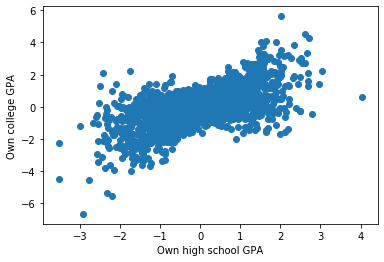

In [179]:
# [Answer to ex. 12.1.3 here]
plt.scatter(df['high_school_GPA'], df['college_GPA'])
plt.xlabel('Own high school GPA')
plt.ylabel('Own college GPA')


<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

In [180]:
# [Answer to ex. 12.1.4 here]
# Plot high school GPA vs. roommate's high school GPA
plt.scatter(df['high_school_GPA'], df['high_school_GPA_other'])
plt.xlabel('Own high school GPA')
plt.ylabel('Roommate´s high school GPA');

# Regress high school GPA on rommies' high school GPA
y = df['high_school_GPA']
x = df['high_school_GPA_other']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

KeyError: 'high_school_GPA_other'

There seems to be little correlation between the roommates' GPA.

The t-test size for the coefficient and the intercept are both insignificant. The coefficient itself is -.006 which is small. Thus we reject the null hypothesis of roommate y's HS GPA having an effect on roommate x's HS GPA. 

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

In [181]:
# [Answer to ex. 12.1.5 here]
# Plot college GPA vs. roomate's high school GPA
plt.scatter(df['college_GPA'], df['high_school_GPA_other'])
plt.xlabel('Own college GPA')
plt.ylabel('Roommate´s high school GPA')

# Regress high school GPA on rommies' and own high school GPA
y = df['college_GPA']
x = df[['high_school_GPA','high_school_GPA_other']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

KeyError: 'high_school_GPA_other'

Your roommates HS GPA doesn't have a significant effect on your college GPA, but your own HS GPA has an significant effect of .70 on your college GPA. 

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [182]:
# [Answer to ex. 12.1.6 here]
# Regressing college GPA on own high school GPA and roommies' college GPA
y = df['college_GPA']
x = df[['high_school_GPA','college_GPA_other']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

KeyError: "['college_GPA_other'] not in index"

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words. 
The analysis identify with variation in the combination of students in the classes from year to year to estimate the final primary school grade or income in life later on. To combat idiosyncratic characteristics in the error term, they use first difference. Using first difference captures the characteristics of the parents choosing that school, and focuses on the difference the class combination entails.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?
<br /> One shortcoming is that Kraka don't identify the effect of peers whom a child encounters in the classroom. I.e. pupils with the same background may group together in a classroom. <br />
Hoby (2000) uses sources of variation that are credibly idiosyncratic, such as changes in the gender and racial composition of a grade in a school in adjacent years. Moreover, Hoby (2000) uses specification tests, "one based on randomizing the order of year, to confirm that the variation I use is not generated by time trends or other non-idiosyncratic forces."    

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms. <br /> 
One could try to capture whom pupils group with, and estimate based on these groups rather than classes. This is difficult, as it requires the pupils honestly tell who they group with. However, if you ignore privacy concerns, you could register that by tracking phones and see who spends the most time together, assuming they also group in school classes.
